In [1]:
!pip install mlflow

## All required commands to install MLflow on EC2:

https://github.com/entbappy/MLflow-Basic-Demo

In [3]:
# Test mlflow

import mlflow

mlflow.set_tracking_uri("http://ec2-184-73-117-95.compute-1.amazonaws.com:5000/")

with mlflow.start_run():
    mlflow.log_param("param1", 15)
    mlflow.log_metric("metric1", 0.89)

🏃 View run painted-snail-569 at: http://ec2-184-73-117-95.compute-1.amazonaws.com:5000/#/experiments/0/runs/3cc95575410340979f99798e63c43657
🧪 View experiment at: http://ec2-184-73-117-95.compute-1.amazonaws.com:5000/#/experiments/0


In [6]:
#creating baseline model

import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivekpaswan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vivekpaswan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment

In [27]:
# Apply the preprocessing function to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)

In [28]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [29]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Step 1: Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=10000)  # Bag of Words model with a limit of 1000 features

In [31]:
X = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']  # Assuming 'sentiment' is the target variable (0 or 1 for binary classification)

In [32]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(36793, 10000))

In [33]:
X.shape

(36793, 10000)

In [34]:
y

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 36793, dtype: int64

In [35]:
y.shape

(36793,)

In [36]:
# Step 2: Set up the MLflow tracking server
mlflow.set_tracking_uri("http://ec2-184-73-117-95.compute-1.amazonaws.com:5000/")

In [37]:
# Set or create an experiment
mlflow.set_experiment("RF Baseline")

2026/02/17 22:32:34 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://mlflow-tracking-buc25/1', creation_time=1771347754881, experiment_id='1', last_update_time=1771347754881, lifecycle_stage='active', name='RF Baseline', tags={}>

In [38]:
!pip install boto3

In [39]:
!pip install awscli

  Using cached botocore-1.42.49-py3-none-any.whl.metadata (5.9 kB)
  Using cached s3transfer-0.16.0-py3-none-any.whl.metadata (1.7 kB)
Using cached botocore-1.42.49-py3-none-any.whl (14.6 MB)
Using cached s3transfer-0.16.0-py3-none-any.whl (86 kB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.93
    Uninstalling botocore-1.35.93:
      Successfully uninstalled botocore-1.35.93
  Attempting uninstall: s3transfer━━━━━━━━━━━━━━ 0/2 [botocore]
    Found existing installation: s3transfer 0.10.40/2 [botocore]
    Uninstalling s3transfer-0.10.4:━━━━━━━━━ 0/2 [botocore]
      Successfully uninstalled s3transfer-0.10.4 0/2 [botocore]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [s3transfer]2 [s3transfer]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.17.0 requires botocore<1.35.94,>=1.35.74, but you have botocore 1.42.

In [40]:
!aws configure



AWS Access Key ID [****************BT4B]: ^C


2026/02/17 22:40:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/miniconda3/envs/mlproj/lib/python3.11/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-184-73-117-95.compute-1.amazonaws.com:5000/#/experiments/1/runs/e328e0952812412a84be44b7e3b38285
🧪 View experiment at: http://ec2-184-73-117-95.compute-1.amazonaws.com:5000/#/experiments/1


ImportError: cannot import name 'ChatResponse' from 'mlflow.types.llm' (/opt/miniconda3/envs/mlproj/lib/python3.11/site-packages/mlflow/types/llm.py)

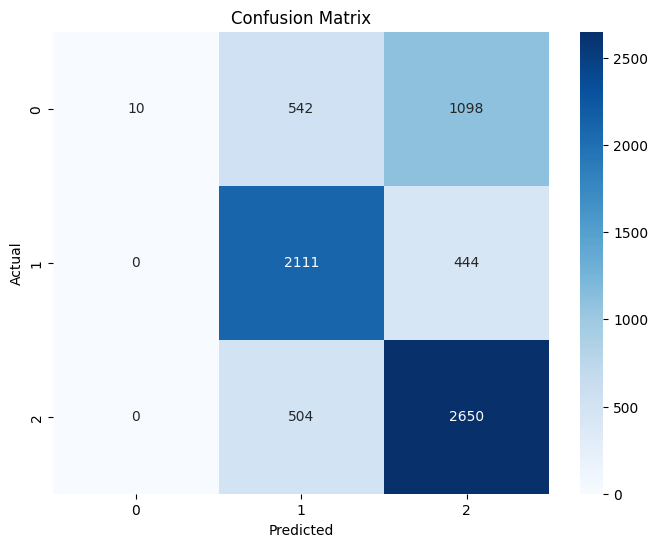

In [44]:
# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Define and train a Random Forest baseline model using a simple train-test split
with mlflow.start_run() as run:
    # Log a description for the run
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    # Add a description
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

    # Log parameters for the vectorizer
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    # Log Random Forest parameters
    n_estimators = 200
    max_depth = 15

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Log metrics for each class and accuracy
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log the confusion matrix plot
    plt.savefig("confusion_matrix.png")
   

    # Log the Random Forest model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Optionally log the dataset itself (if it's small enough)
    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.01      1650
           0       0.67      0.83      0.74      2555
           1       0.63      0.84      0.72      3154

    accuracy                           0.65      7359
   macro avg       0.77      0.56      0.49      7359
weighted avg       0.73      0.65      0.57      7359



In [ ]:
df.to_csv('reddit_preprocessing.csv', index=False)

In [ ]:
pd.read_csv('reddit_preprocessing.csv').head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
